In [8]:
import tensorflow as tf

# Setup plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [4]:
import pandas as pd

df = pd.read_csv('concrete.csv')
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.shape

(1030, 9)

In [7]:
# Segregating feature and target variables
x_org = df.drop('CompressiveStrength',axis=1).values
y_org = df['CompressiveStrength'].values

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\P

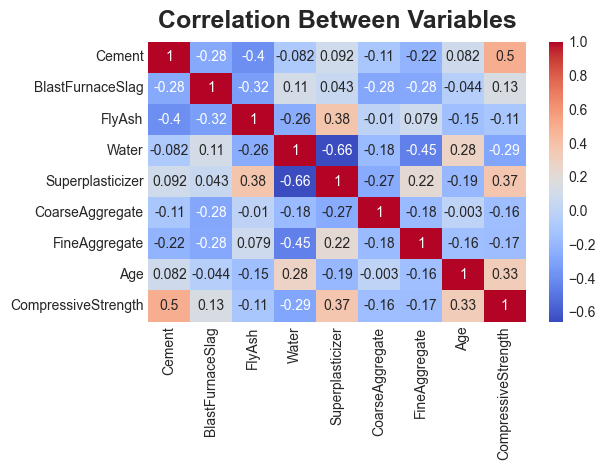

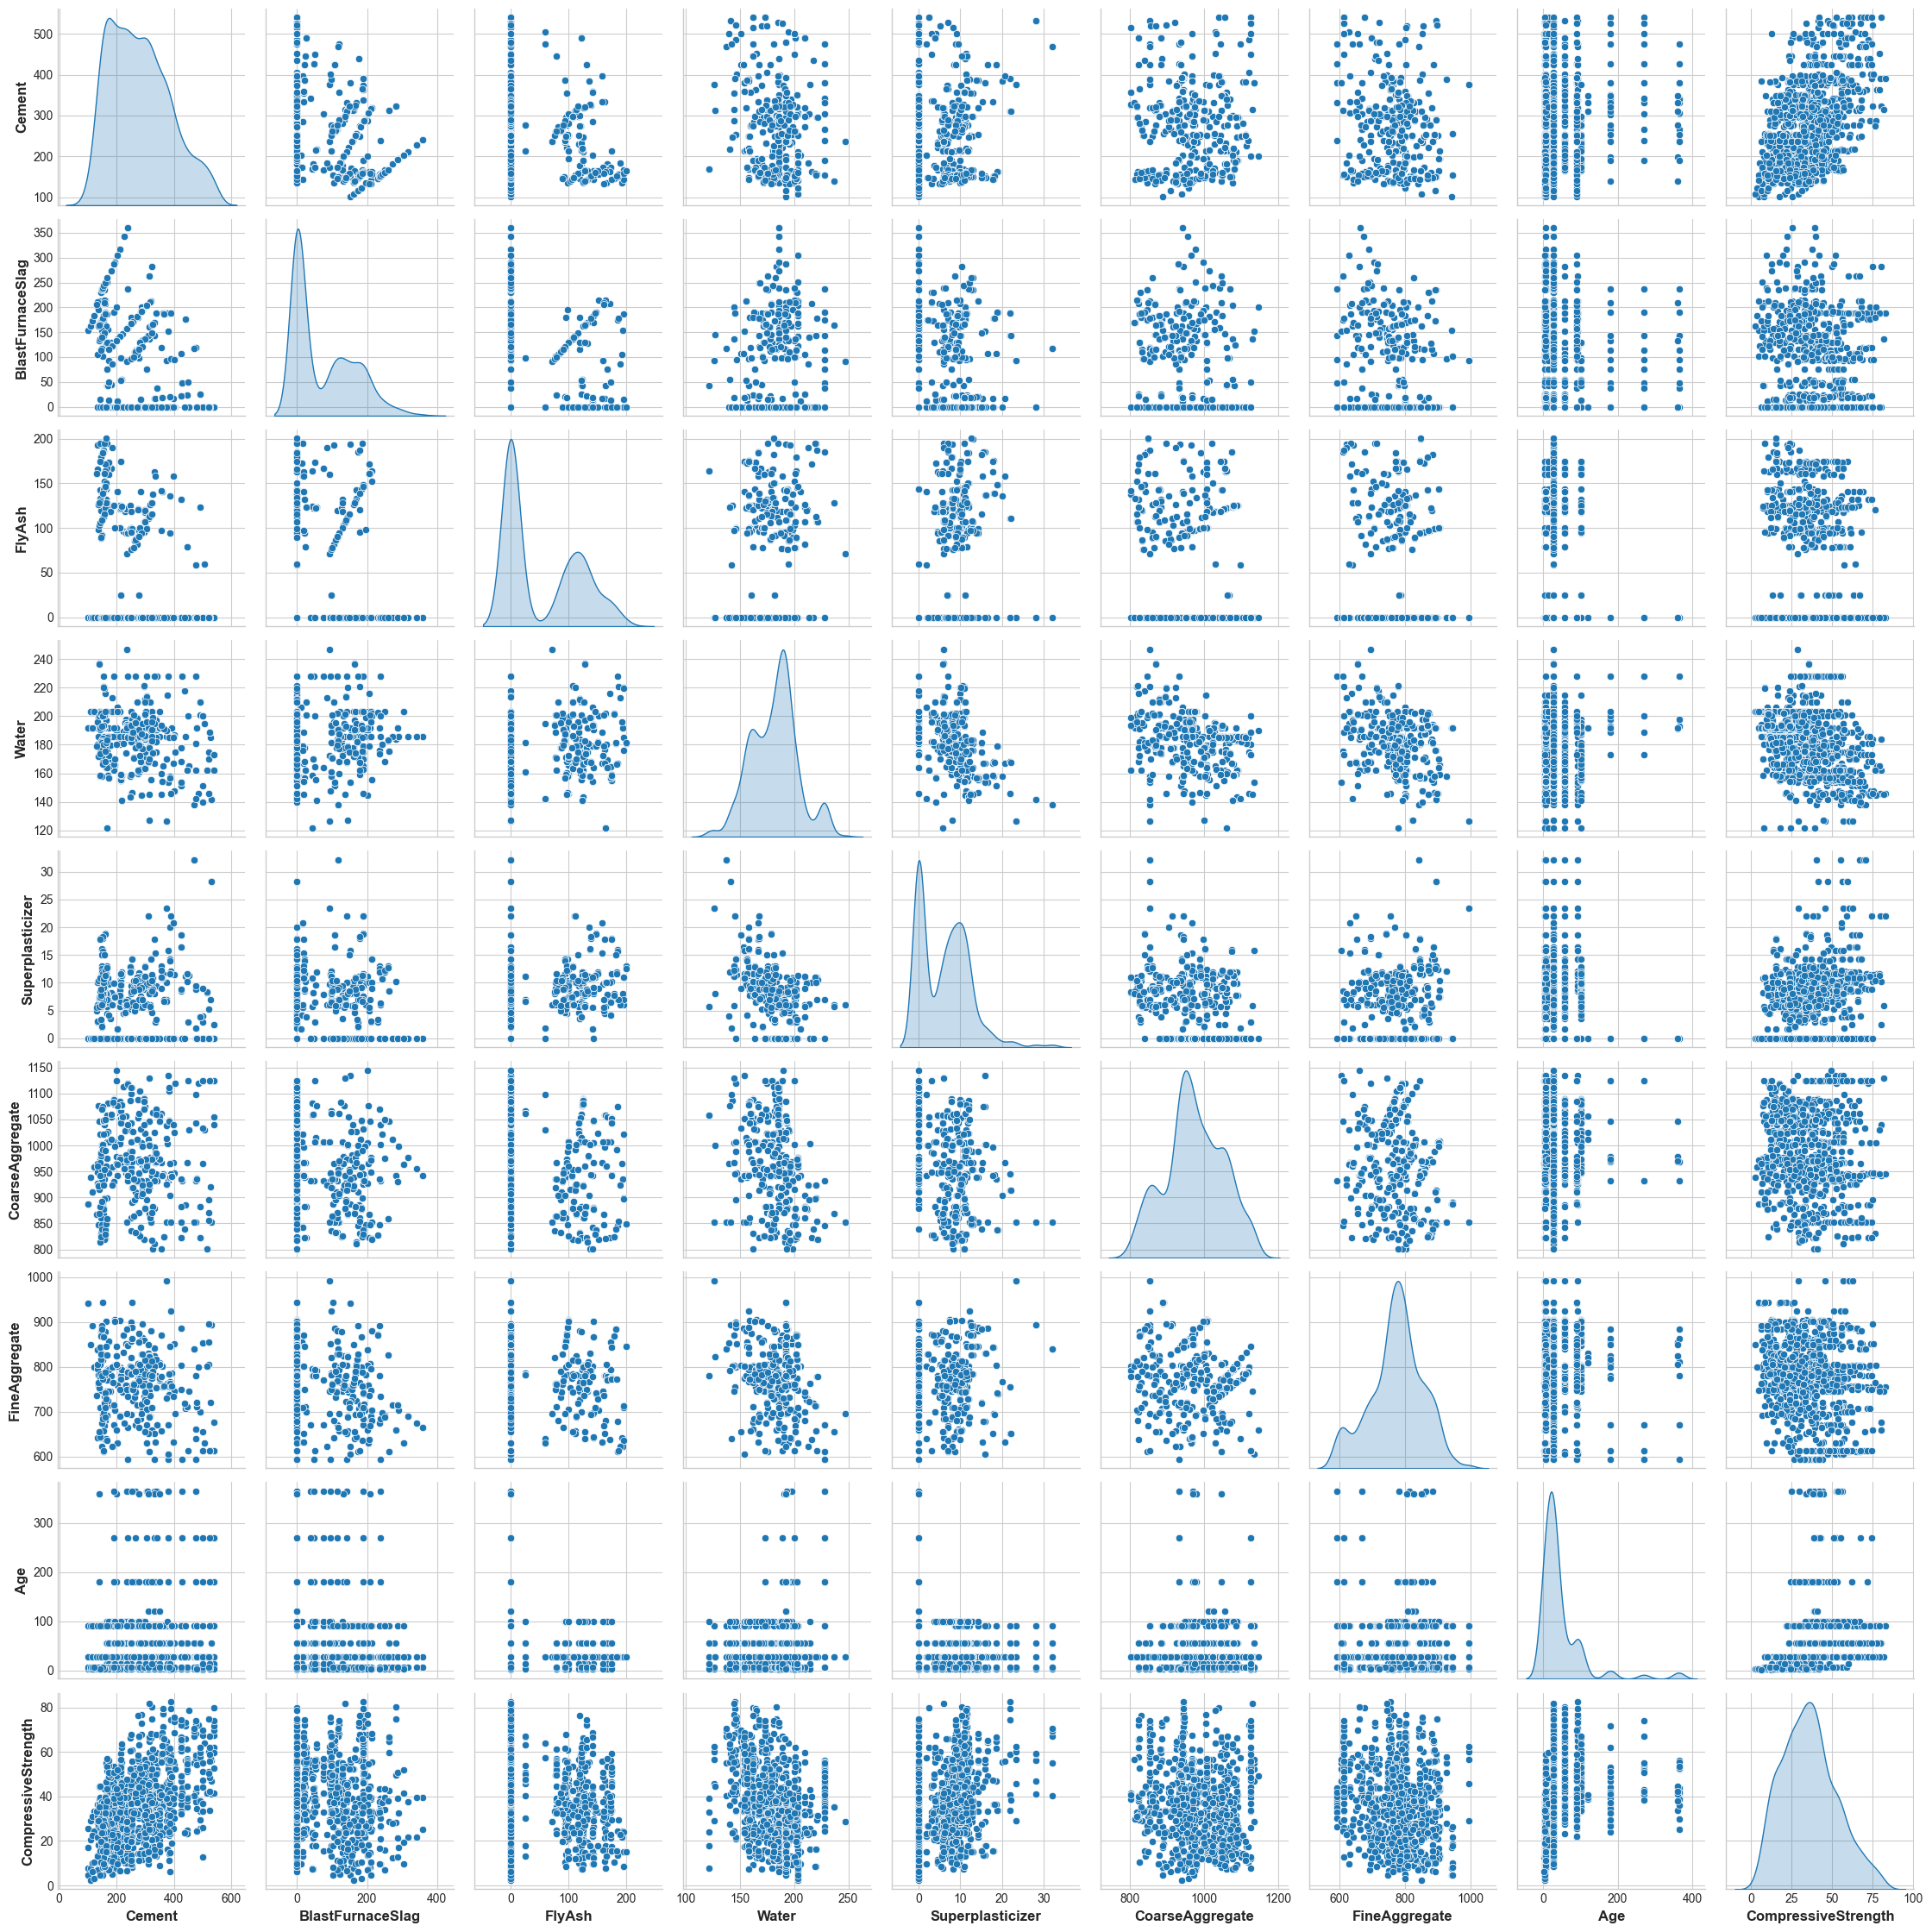

In [9]:
# Plotting correlation heatmap
corr = df.corr()
sns.heatmap(corr,xticklabels=True,yticklabels=True,annot = True,cmap ='coolwarm')
plt.title("Correlation Between Variables")

# # pair Plot
sns.pairplot(df,palette="husl",diag_kind="kde")

In [11]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=[8]),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.BatchNormalization(),
    # the linear output layer 
    layers.Dense(units=1),
])

In [16]:
from keras import backend
#Defining Root Mean Square Error As our Metric Function 
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [17]:
# Optimize , Compile And Train The Model 
opt =keras.optimizers.Adam(lr=0.0015)

model.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse])
history = model.fit(X_train,y_train,epochs = 35 ,batch_size=32,validation_split=0.1)

print(model.summary())

Epoch 1/35
21/21 [==============================] - 2s 27ms/step - loss: 1385.3058 - rmse: 35.5131 - val_loss: 1510.6318 - val_rmse: 35.4342
Epoch 2/35
21/21 [==============================] - 0s 21ms/step - loss: 1267.2870 - rmse: 34.7407 - val_loss: 1447.6376 - val_rmse: 34.7923
Epoch 3/35
21/21 [==============================] - 0s 19ms/step - loss: 1179.7543 - rmse: 33.6104 - val_loss: 1329.9683 - val_rmse: 33.2375
Epoch 4/35
21/21 [==============================] - 0s 17ms/step - loss: 1070.0066 - rmse: 31.9268 - val_loss: 1159.2800 - val_rmse: 30.9019
Epoch 5/35
21/21 [==============================] - 0s 17ms/step - loss: 910.7788 - rmse: 29.4382 - val_loss: 996.4644 - val_rmse: 28.3651
Epoch 6/35
21/21 [==============================] - 0s 18ms/step - loss: 720.2673 - rmse: 26.1573 - val_loss: 824.3288 - val_rmse: 25.1453
Epoch 7/35
21/21 [==============================] - 0s 19ms/step - loss: 526.1390 - rmse: 22.1350 - val_loss: 590.8292 - val_rmse: 20.3745
Epoch 8/35
21/21 [=

In [18]:
y_predict = model.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test,y_predict))

10/10 [==============================] - 0s 3ms/step
0.8735449342594467


In [ ]:
y_predict = model.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test,y_predict))

10/10 [==============================] - 0s 3ms/step
0.8735449342594467


In [ ]:
y_predict = model.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test,y_predict))

10/10 [==============================] - 0s 3ms/step
0.8735449342594467


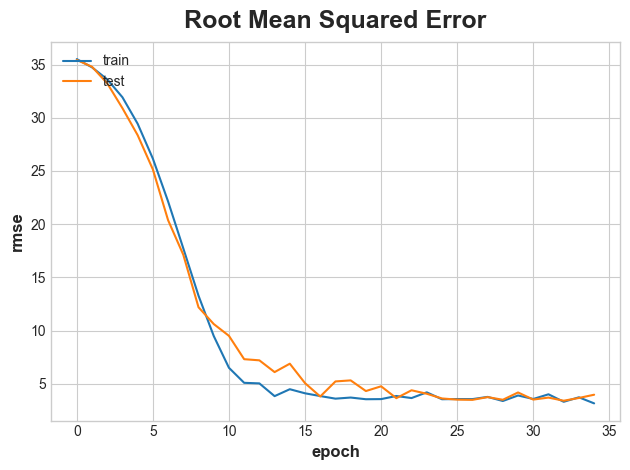

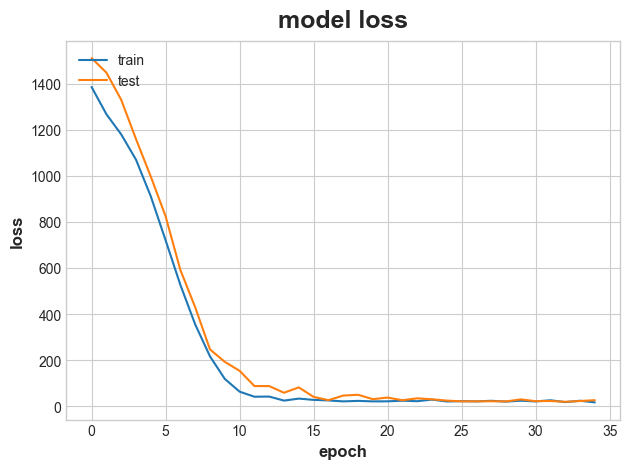

In [19]:
# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('4.png')
plt.show()